## Trapezoidal rule

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [234]:
#for multiple segment  trapezoidal rule
def trap(n, h, f):
    """
    n  = no of trapezoids
    h = (b - a) / n 
    where a is the lowerbound and b is the upperbound  for integrand
    f = values of f(x)
    """
    n = n+1
    sum = f[0]
    for i in range(1, n-1):
        sum = sum + 2* f[i]
    sum = sum + f[n-1]
    return h*(sum/2)

### example
estimate the integral of $f(x)=0.2 + 25x- 200x^{2} + 675x^{3} - 900x^{4} + 400x^{5}$ from $x= 0$ to $0.8$. The exact value is $1.640533$. 

In [81]:
#f(x)
f = lambda x: 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5
h = lambda a,b,n: (b-a)/n

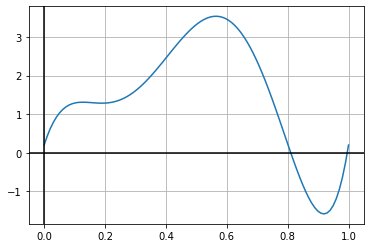

In [235]:
#graph of the function
xs = np.linspace(0,1,100)
ys = list(map(f, xs))
plt.plot(xs,ys)
plt.grid(True, which='both')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')

In [252]:
n = 10 # no of trpezoids
a = 0 # lowerbound
b = 0.8 #upperbound
xx = [a] # values of xs
h1 = h(a,b,n) 
for _ in range(n):
    a = a + h1
    xx.append(a)
yy = list(map(f, xx))
cc = list(map(lambda x,y: (x,y), xx,yy))
pd.DataFrame(cc)

,0,1
0,0.00,0.200000
1,0.08,1.230047
2,0.16,1.296919
3,0.24,1.343721
4,0.32,1.743393
5,0.40,2.456000
6,0.48,3.186015
7,0.56,3.539607
8,0.64,3.181929
9,0.72,1.994401


In [253]:
# estimated area under the curve
trap(n, h(0, 0.8,n),yy)

1.615042560000008

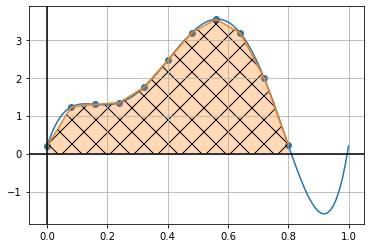

In [254]:
xs = np.linspace(0,1,100)
ys = list(map(f, xs))
plt.plot(xs,ys)
plt.scatter(xx,yy)
plt.plot(xx,yy)
plt.fill_between(xx,yy, hatch='X', alpha=0.3)
plt.grid(True, which='both')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')

# Simpson's Rules

In [255]:
#multiple-applications of simpson's rule for both odd and even segments
def simpsons(a,b, n, f):
    h = (b-a)/n
    sum = 0
    if n == 1:
        sum = h*(f[n-1]+f[n])/2
    else:
        m = n
        odd = n%2 == 1
        if odd and n>1:
            sum = sum +  3*h*(f[n-3]+3*(f[n-2]+f[n-1])+f[n])/8
            m = n - 3
        if m > 1:
            def simp13m(h,n,f):
                sum1 = f[0]
                for i in range(1, n-1, 2):
                    sum1 = sum1 + 4*f[i]+2*f[i+1]
                sum1 = sum1 + 4*f[n-1]+f[n]
                return h* (sum1/3)
            sum = sum + simp13m(h,m,f)
    return sum      

In [257]:
simpsons(0, 0.8, 10, yy)

1.6400964266666744